In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap= None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

## Our Task : Draw Contours Around the coins

In [3]:
sep_coins = cv2.imread('F:/Imarticus Class 33/Computer Vision/Images/pennies.jpg')

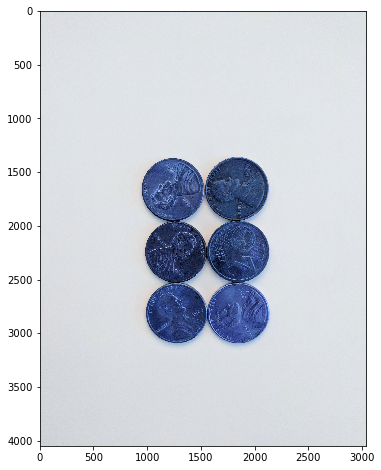

In [4]:
display(sep_coins)

## Apply Median Blurring

In [5]:
# since we have too much detail here we need to blur the image 
## Blurring is age detection technique or smoothning of image
# the more the blur we can understand the age of the image

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

In [7]:
# sep_blur = cv2.getGaussianKernel([5,25])

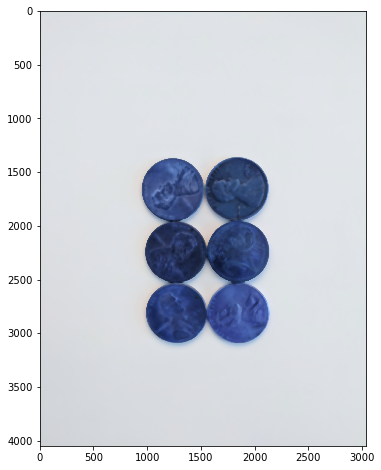

In [8]:
display(sep_blur)

In [9]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

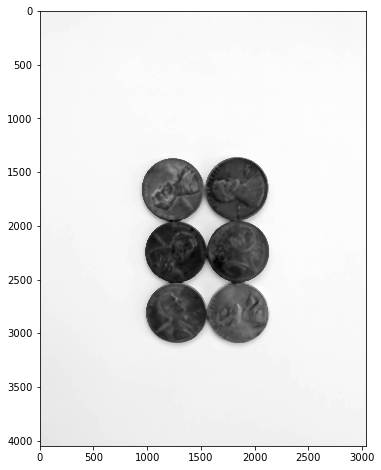

In [10]:
display(gray_sep_coins,cmap='gray')

# Binary Threshold

In [11]:
# Segmenting img into diff parts
# converting img into black and white
# Image is inversed

In [12]:
ret, sep_thresh= cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

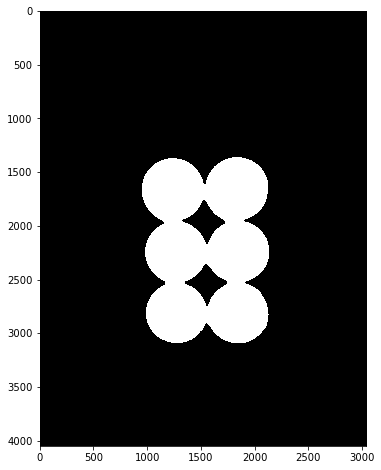

In [13]:
display(sep_thresh,cmap='gray')

# Find Contours

In [14]:
# finding Edges of the image

In [15]:
image, contours, hierarchy =cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
# For every entry in contours
for i in range(len(contours)):
    
    # Last column in array is -1 if an external contour(no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

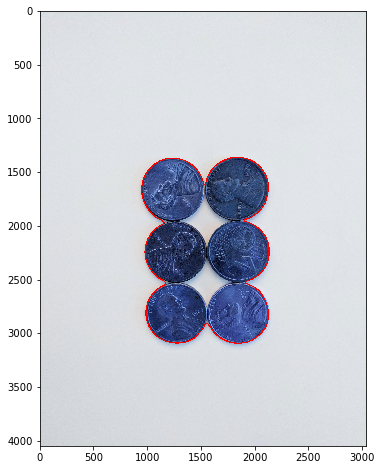

In [17]:
display(sep_coins)

# Using The WaterShed Algo

### Apply Threshold (inverse Binary with OTSU as well)

# Step 1 Read 

In [18]:
img = cv2.imread('F:/Imarticus Class 33/Computer Vision/Images/pennies.jpg')

# Step 2: Apply Blur

In [19]:
img = cv2.medianBlur(img,35)

# Step 3: Convert to Grayscale

In [20]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Step 4: Apply Threshold (Inverse Binary with OTSU as well)

In [21]:
ret, thresh= cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

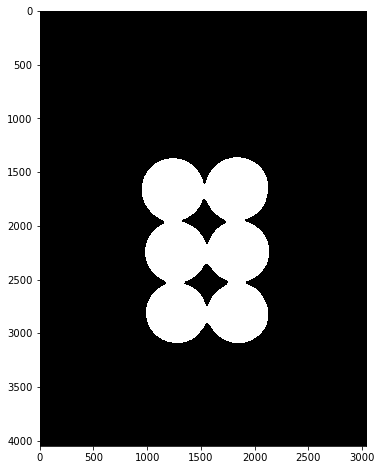

In [22]:
display(thresh, cmap='gray')

In [23]:
#Step 5: Noise Removal

In [24]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 10)

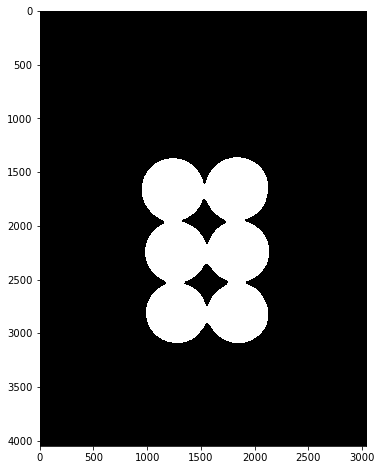

In [25]:
display(opening,cmap='gray')

# Create Dilation 
# Step 6: Grab Background that u are sure of

In [26]:
# Sure Background area
sure_bg = cv2.dilate(opening,kernel,iterations=10)

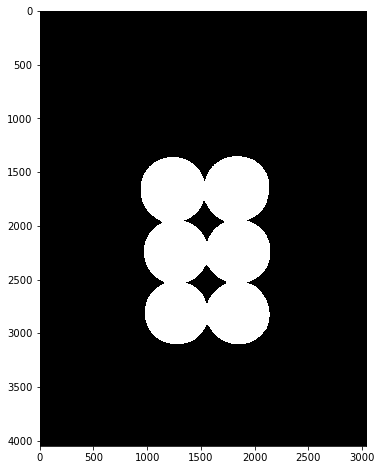

In [27]:
display(sure_bg,cmap='gray')

# Step 7 : Find sure Foreground

In [28]:
# Finding sure Foreground image
# finding the centers of the circles

In [29]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.9*dist_transform.max(),255,0)


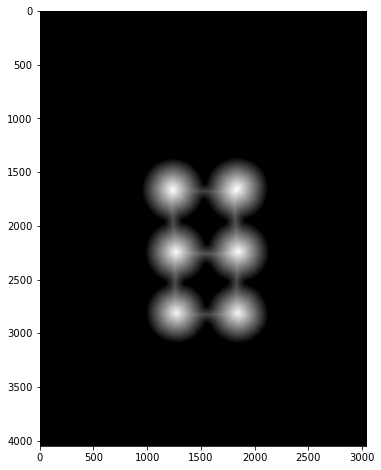

In [30]:
display(dist_transform, cmap='gray')

# Step 8: Find Unknown region

In [31]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

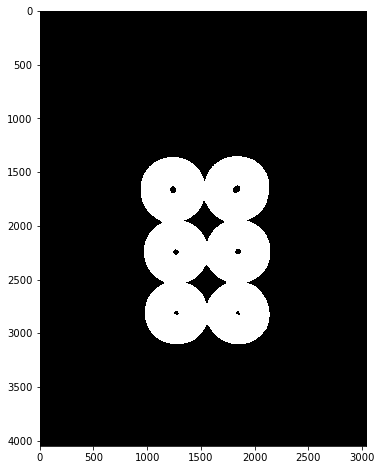

In [32]:
display(unknown,cmap='gray')

# Step 9: Label Markers of Sure Foreground

In [33]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


# Step 10 Apply Watersheding ALgo to find markers

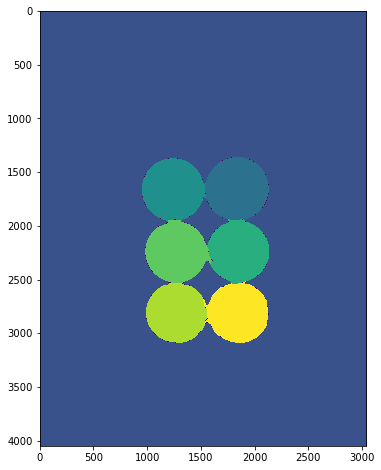

In [34]:
markers = cv2.watershed(img,markers)
display(markers)

# Step 11 Find Contours on Markers

In [35]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)


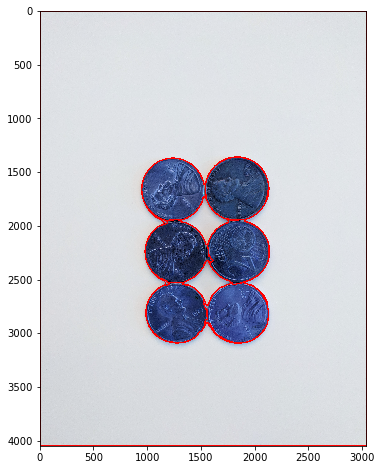

In [36]:
display(sep_coins)